In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from sklearn import preprocessing
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

In [2]:
df = pd.read_csv("Players_20.csv")

# =======================Pre-Processing Data=======================

# Sebelum Pre-Processing

In [3]:
df

sofifa_id                                         player_url  \
0         158023  https://sofifa.com/player/158023/lionel-messi/...   
1          20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2         190871  https://sofifa.com/player/190871/neymar-da-sil...   
3         200389  https://sofifa.com/player/200389/jan-oblak/200002   
4         183277  https://sofifa.com/player/183277/eden-hazard/2...   
...          ...                                                ...   
18478     245006  https://sofifa.com/player/245006/shuai-shao/20...   
18479     250995  https://sofifa.com/player/250995/mingjie-xiao/...   
18480     252332  https://sofifa.com/player/252332/wei-zhang/200002   
18481     251110  https://sofifa.com/player/251110/haijian-wang/...   
18482     233449  https://sofifa.com/player/233449/ximing-pan/20...   

              short_name                            long_name  age  \
0               L. Messi       Lionel Andrés Messi Cuccittini   32   
1      Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34   
2              Neymar Jr        Neymar da Silva Santos Júnior   27   
3               J. Oblak                            Jan Oblak   26   
4              E. Hazard                          Eden Hazard   28   
...                  ...                                  ...  ...   
18478         Shao Shuai                                   邵帅   22   
18479       Xiao Mingjie                                  肖明杰   22   
18480          Zhang Wei                                   张威   19   
18481       Wang Haijian                                  汪海健   18   
18482         Pan Ximing                                  潘喜明   26   

              dob  height_cm  weight_kg nationality  \
0      1987-06-24        170         72   Argentina   
1      1985-02-05        187         83    Portugal   
2      1992-02-05        175         68      Brazil   
3      1993-01-07        188         87    Slovenia   
4      1991-01-07        175         74     Belgium   
...           ...        ...        ...         ...   
18478  1997-03-10        186         79    China PR   
18479  1997-01-01        177         66    China PR   
18480  2000-05-16        186         75    China PR   
18481  2000-08-02        185         74    China PR   
18482  1993-01-11        182         78    China PR   

                           club_name  ...   lwb   ldm   cdm   rdm   rwb    lb  \
0                       FC Barcelona  ...  68+6  66+6  66+6  66+6  68+6  63+6   
1                           Juventus  ...  65+3  62+3  62+3  62+3  65+3  61+3   
2                Paris Saint-Germain  ...  67+6  61+6  61+6  61+6  67+6  61+6   
3                    Atlético Madrid  ...  32+3  36+3  36+3  36+3  32+3  32+3   
4                        Real Madrid  ...  66+6  63+6  63+6  63+6  66+6  61+6   
...                              ...  ...   ...   ...   ...   ...   ...   ...   
18478               Beijing Renhe FC  ...  43+2  42+2  42+2  42+2  43+2  45+2   
18479               Shanghai SIPG FC  ...  45+2  44+2  44+2  44+2  45+2  47+2   
18480         Hebei China Fortune FC  ...  47+2  50+2  50+2  50+2  47+2  48+2   
18481  Shanghai Greenland Shenhua FC  ...  48+2  49+2  49+2  49+2  48+2  49+2   
18482         Hebei China Fortune FC  ...  48+2  50+1  50+1  50+1  48+2  49+2   

        lcb    cb   rcb    rb  
0      53+6  53+6  53+6  63+6  
1      54+3  54+3  54+3  61+3  
2      47+6  47+6  47+6  61+6  
3      33+3  33+3  33+3  32+3  
4      49+6  49+6  49+6  61+6  
...     ...   ...   ...   ...  
18478  47+2  47+2  47+2  45+2  
18479  47+2  47+2  47+2  47+2  
18480  49+2  49+2  49+2  48+2  
18481  49+2  49+2  49+2  49+2  
18482  50+1  50+1  50+1  49+2  

[18483 rows x 106 columns]

In [4]:
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', None) 

In [5]:
df.isnull().sum()

sofifa_id                         0
player_url                        0
short_name                        0
long_name                         0
age                               0
dob                               0
height_cm                         0
weight_kg                         0
nationality                       0
club_name                       240
league_name                     240
league_rank                     240
overall                           0
potential                         0
value_eur                         0
wage_eur                          0
player_positions                  0
preferred_foot                    0
international_reputation          0
weak_foot                         0
skill_moves                       0
work_rate                         0
body_type                         0
real_face                         0
release_clause_eur             1298
player_tags                   16971
team_position                   240
team_jersey_number          

In [6]:
players_heights = df[["short_name", "height_cm"]]

In [7]:
pd.set_option('display.max_rows', 30) 
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', None) 

In [8]:
players_heights

short_name  height_cm
0               L. Messi        170
1      Cristiano Ronaldo        187
2              Neymar Jr        175
3               J. Oblak        188
4              E. Hazard        175
...                  ...        ...
18478         Shao Shuai        186
18479       Xiao Mingjie        177
18480          Zhang Wei        186
18481       Wang Haijian        185
18482         Pan Ximing        182

[18483 rows x 2 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18483 entries, 0 to 18482
Columns: 106 entries, sofifa_id to rb
dtypes: float64(18), int64(44), object(44)
memory usage: 14.9+ MB


In [10]:
df.describe()

sofifa_id           age     height_cm     weight_kg   league_rank  \
count   18483.000000  18483.000000  18483.000000  18483.000000  18243.000000   
mean   219768.374885     25.283071    181.348212     75.259049      1.371430   
std     28047.535516      4.656790      6.760648      7.053023      0.782132   
min        41.000000     16.000000    155.000000     50.000000      0.000000   
25%    204495.500000     22.000000    177.000000     70.000000      1.000000   
50%    226215.000000     25.000000    181.000000     75.000000      1.000000   
75%    240880.000000     29.000000    186.000000     80.000000      2.000000   
max    252905.000000     42.000000    205.000000    110.000000      4.000000   

            overall     potential     value_eur       wage_eur  \
count  18483.000000  18483.000000  1.848300e+04   18483.000000   
mean      66.198885     71.500893  2.461422e+06    9563.084997   
std        6.950927      6.140787  5.557379e+06   21035.987405   
min       48.000000     49.000000  0.000000e+00       0.000000   
25%       62.000000     67.000000  3.250000e+05    2000.000000   
50%       66.000000     71.000000  7.000000e+05    3000.000000   
75%       71.000000     75.000000  2.000000e+06    9000.000000   
max       94.000000     95.000000  1.055000e+08  575000.000000   

       international_reputation     weak_foot   skill_moves  \
count              18483.000000  18483.000000  18483.000000   
mean                   1.102473      2.943570      2.365796   
std                    0.377795      0.664876      0.764424   
min                    1.000000      1.000000      1.000000   
25%                    1.000000      3.000000      2.000000   
50%                    1.000000      3.000000      2.000000   
75%                    1.000000      3.000000      3.000000   
max                    5.000000      5.000000      5.000000   

       release_clause_eur  team_jersey_number  contract_valid_until  \
count        1.718500e+04        18243.000000          18243.000000   
mean         4.695156e+06           20.088911           2021.114455   
std          1.097328e+07           16.572198              1.289246   
min          1.300000e+04            1.000000           2019.000000   
25%          5.510000e+05            9.000000           2020.000000   
50%          1.200000e+06           17.000000           2021.000000   
75%          3.600000e+06           27.000000           2022.000000   
max          1.958000e+08           99.000000           2026.000000   

       nation_jersey_number          pace      shooting       passing  \
count           1127.000000  16422.000000  16422.000000  16422.000000   
mean              12.108252     67.693216     52.259956     57.191390   
std                6.736264     11.293819     14.021544     10.403753   
min                1.000000     24.000000     15.000000     24.000000   
25%                6.000000     61.000000     42.000000     50.000000   
50%               12.000000     69.000000     54.000000     58.000000   
75%               18.000000     75.000000     63.000000     64.000000   
max               30.000000     96.000000     93.000000     92.000000   

          dribbling     defending        physic    gk_diving  gk_handling  \
count  16422.000000  16422.000000  16422.000000  2061.000000  2061.000000   
mean      62.495372     51.515589     64.847948    65.373605    63.080543   
std       10.277773     16.404888      9.758609     7.730482     7.265112   
min       23.000000     15.000000     27.000000    44.000000    42.000000   
25%       57.000000     36.000000     59.000000    60.000000    58.000000   
50%       64.000000     56.000000     66.000000    65.000000    63.000000   
75%       69.000000     65.000000     72.000000    70.000000    68.000000   
max       96.000000     90.000000     90.000000    90.000000    92.000000   

        gk_kicking  gk_reflexes     gk_speed  gk_positioning  \
count  2061.000000  2061.000000  2061.000000     2061.000000   
mean   

# Pre-Processing Data

# Menghapus Kolom Yang Bukan Relasi


In [11]:
df.drop(["gk_diving", "gk_handling","gk_kicking","gk_reflexes","gk_speed","gk_positioning", "player_traits", "loaned_from", "player_tags","nation_jersey_number", "nation_position", "defending_marking"], inplace=True, axis = 1)

# Handling Missing Value

In [12]:
df.dropna(inplace=True)

# Hapus Duplicate

In [13]:
df.duplicated().sum()

0

In [14]:
df.isnull().sum()

sofifa_id     0
player_url    0
short_name    0
long_name     0
age           0
             ..
lb            0
lcb           0
cb            0
rcb           0
rb            0
Length: 94, dtype: int64

# ------------------------Visualisasikan Data Setelah Pre-Procesing--------------------------

In [15]:
auto=df[['overall','defending_standing_tackle','mentality_composure','defending_sliding_tackle','attacking_heading_accuracy','power_strength','mentality_aggression','mentality_interceptions','attacking_short_passing','skill_ball_control','movement_reactions','power_jumping']]
auto.head()

overall  defending_standing_tackle  mentality_composure  \
0       94                         37                   96   
1       93                         32                   95   
2       92                         26                   94   
4       91                         27                   91   
5       91                         58                   91   

   defending_sliding_tackle  attacking_heading_accuracy  power_strength  \
0                        26                          70              68   
1                        24                          89              78   
2                        29                          62              49   
4                        22                          61              63   
5                        51                          55              74   

   mentality_aggression  mentality_interceptions  attacking_short_passing  \
0                    48                       40                       92   
1                    63                       29                       83   
2                    51                       36                       87   
4                    54                       41                       89   
5                    76                       61                       92   

   skill_ball_control  movement_reactions  power_jumping  
0                  96                  95             68  
1                  92                  96             95  
2                  95                  92             61  
4                  94                  90             56  
5                  91                  91             63

### Visualisasi Numeric Variable

<Figure size 1080x1080 with 0 Axes>

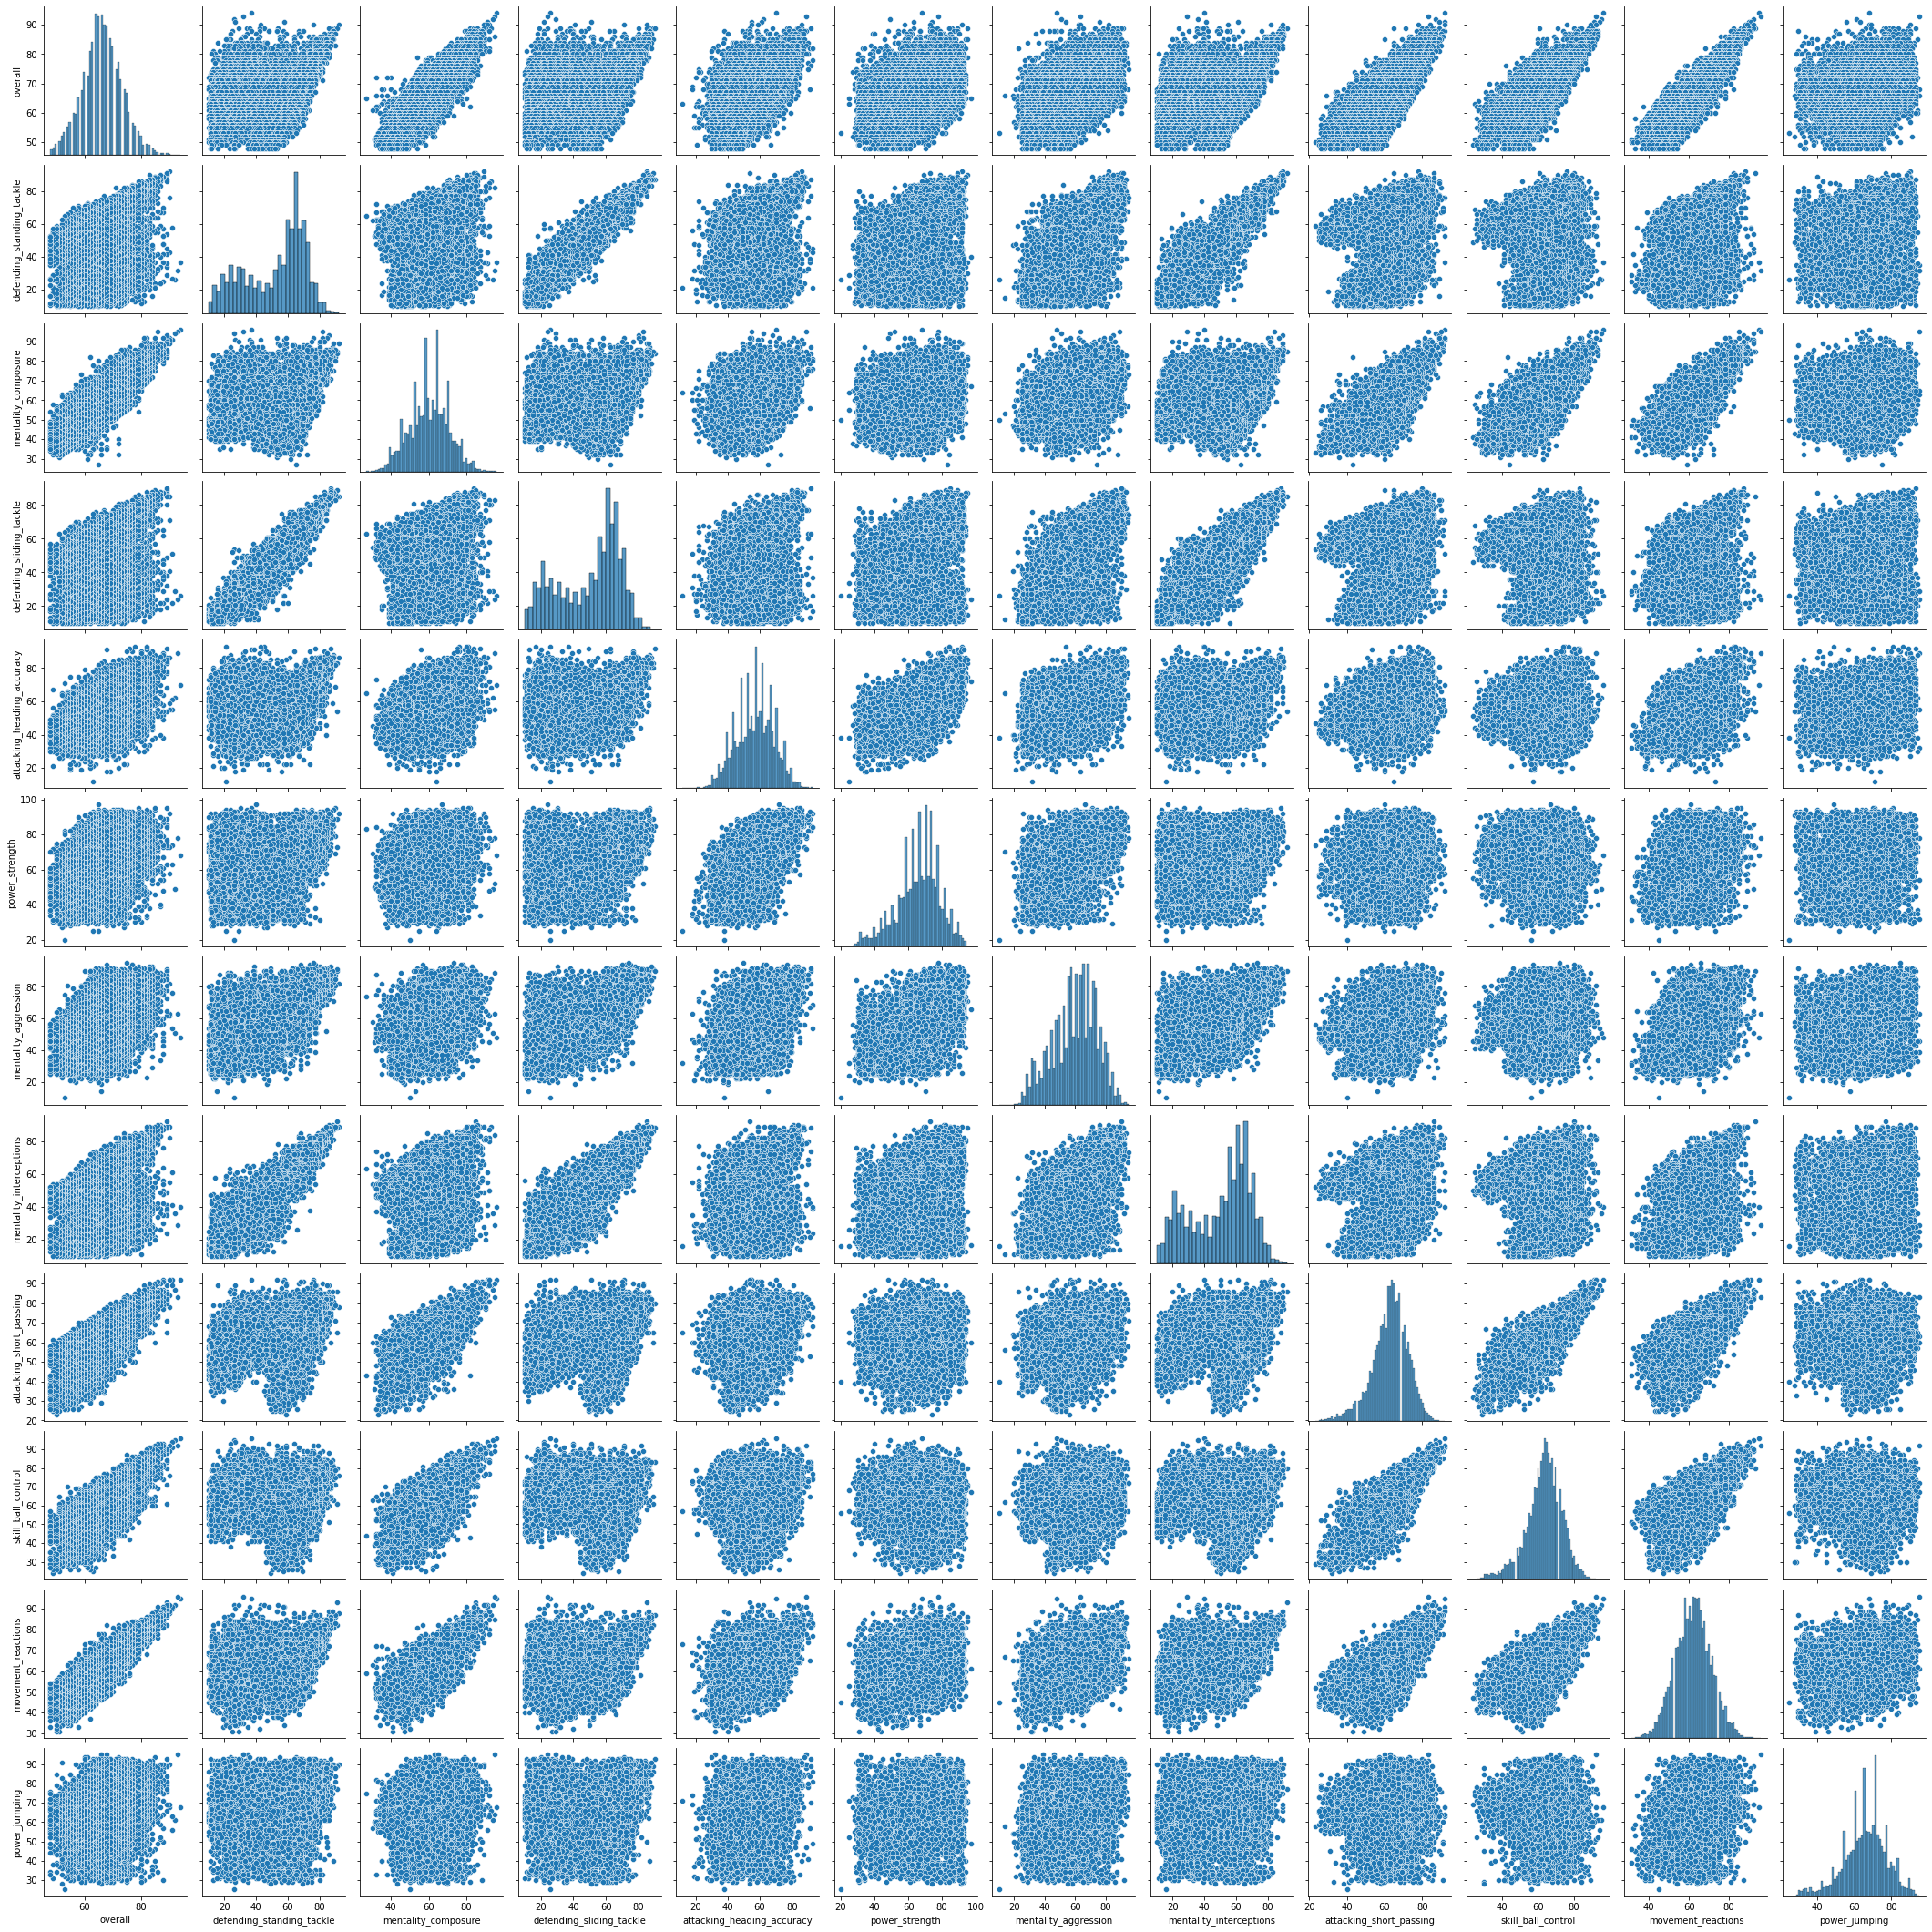

In [16]:
plt.figure(figsize=(15, 15))
sns.pairplot(auto)
plt.show()  

### Cek Relasi Antara attacking_short_passing dengan power_strength

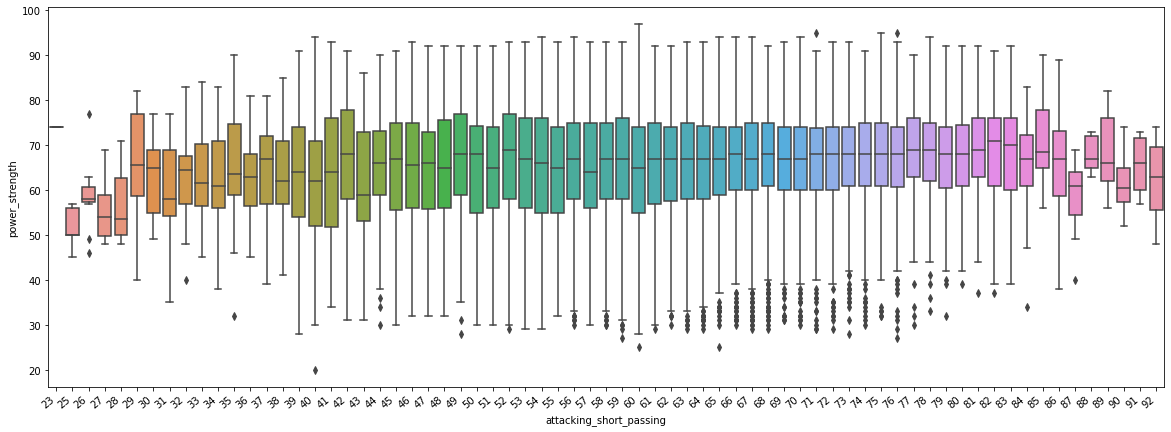

In [17]:
plt.subplots(figsize=(20,7))
ax=sns.boxplot(x='attacking_short_passing',y='power_strength',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

### Cek Relasi Antara movement_reactions dengan power_strength

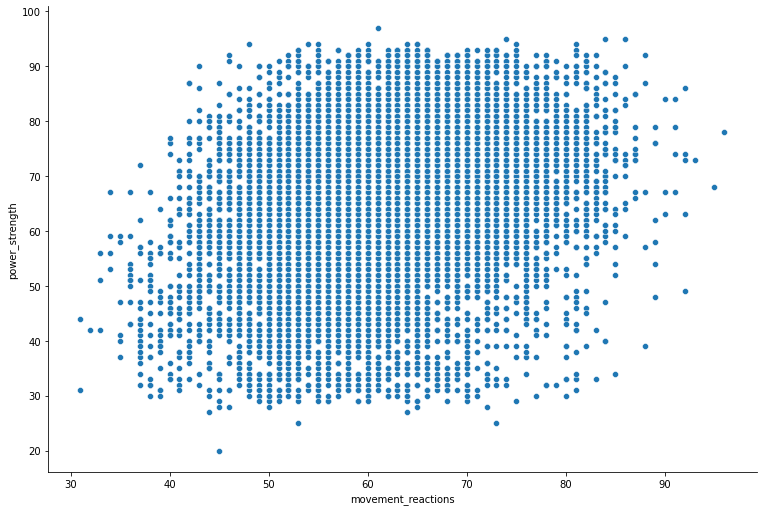

In [18]:
sns.relplot(x='movement_reactions',y='power_strength',data=df,height=7,aspect=1.5)

### Cek Relasi Antara power_strength , movement_reactions,power_jumpin dan overall

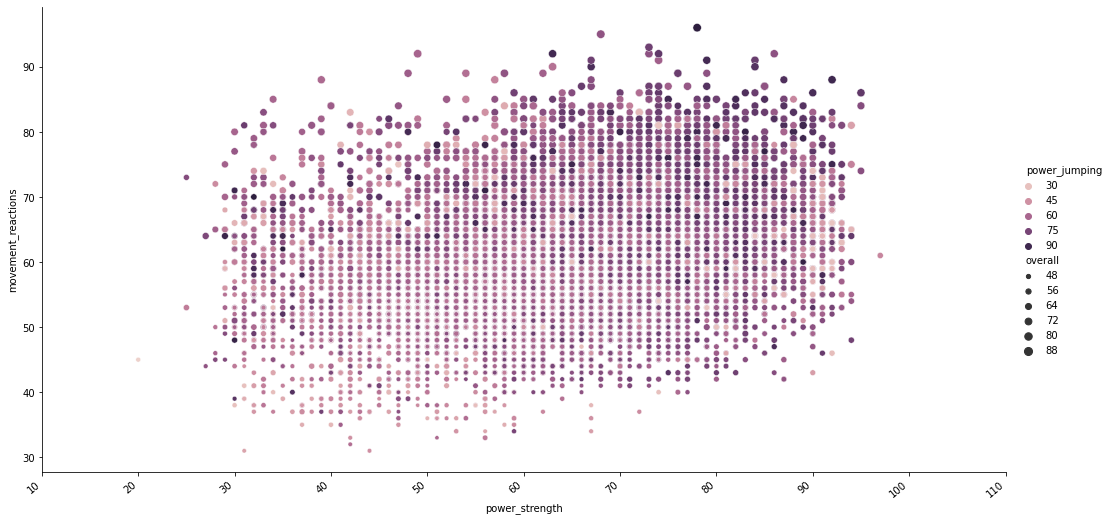

In [19]:
ax=sns.relplot(x='power_strength',y='movement_reactions',data=df,hue='power_jumping',size='overall',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

### Cek Relasi Antara defending_standing_tackle dengan defending_sliding_tackle

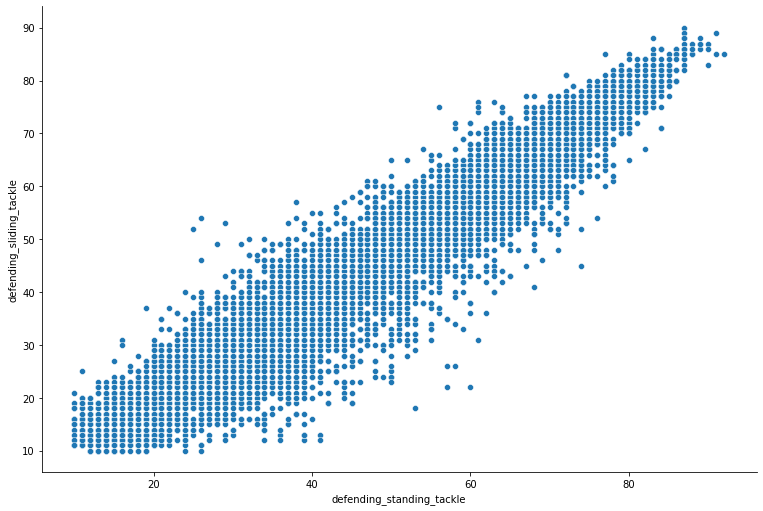

In [20]:
sns.relplot(x='defending_standing_tackle',y='defending_sliding_tackle',data=df,height=7,aspect=1.5)

### Cek Relasi Antara mentality_aggression dengan mentality_composure

<AxesSubplot:xlabel='mentality_aggression', ylabel='mentality_composure'>

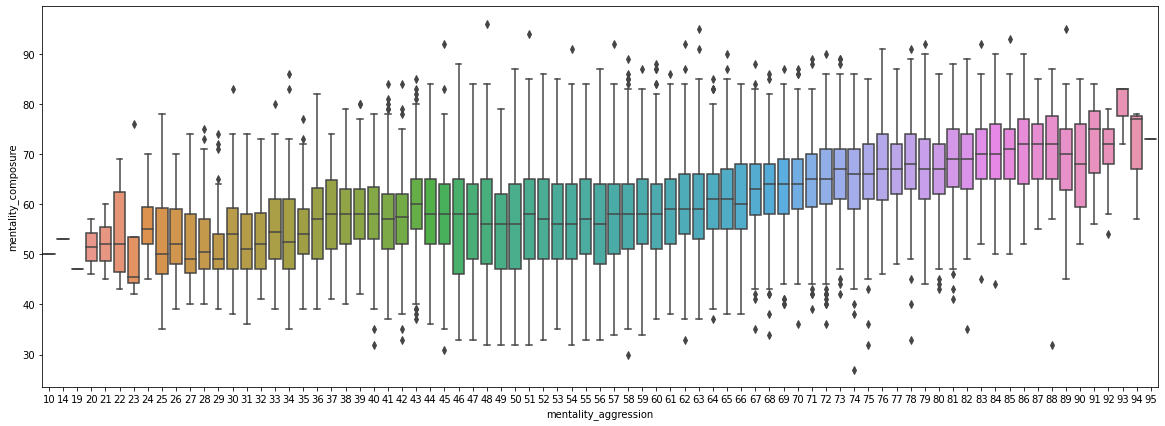

In [21]:
plt.subplots(figsize=(20,7))
sns.boxplot(x='mentality_aggression',y='mentality_composure',data=df)

#  ============================ML===============================

In [22]:
X = df[["defending_standing_tackle","mentality_composure","defending_sliding_tackle", "attacking_heading_accuracy", "power_strength","mentality_aggression","mentality_interceptions", "attacking_short_passing", "skill_ball_control","movement_reactions" ,"power_jumping"]]
y = df["overall"]

In [23]:
from sklearn.model_selection import train_test_split
train_test_split(X,y,test_size=0.2,random_state=0)

[       defending_standing_tackle  mentality_composure  \
 4128                          67                   72   
 849                           72                   80   
 10697                         67                   56   
 4015                          71                   73   
 1495                          59                   70   
 ...                          ...                  ...   
 15767                         42                   55   
 3887                          71                   68   
 11794                         62                   56   
 12929                         63                   54   
 3251                          36                   70   
 
        defending_sliding_tackle  attacking_heading_accuracy  power_strength  \
 4128                         60                          66              68   
 849                          69                          41              65   
 10697                        69                          49  

In [24]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

In [26]:
dt= DecisionTreeClassifier()

In [27]:
lr=LinearRegression()

In [28]:
lr.fit(X_train,y_train)

LinearRegression()

In [29]:
y_pred=lr.predict(X_test)

# Training Acuracy

In [30]:
print('Training Accuracy :',lr.score(X_train,y_train))

Training Accuracy : 0.8636283657395843


# Testing Accuracy

In [31]:
print('Testing Accuracy  :',lr.score(X_test,y_test))

Testing Accuracy  : 0.8652462100754932


# Visualiasi After Multiple Regresion

Text(0, 0.5, 'y_pred')

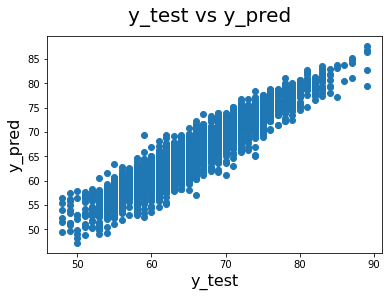

In [32]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)            
plt.xlabel('y_test', fontsize=16)                          
plt.ylabel('y_pred', fontsize=16)   

# Training Prediction

In [33]:
dst=input("defending_standing_tackle : ")
mc=input("mentality_composure : ")
des=input("defending_sliding_tackle : ")
ahc=input("attacking_heading_accuracy : ")
ps=input("power_strength : ")
ma=input("mentality_aggression : ")
mi=input("mentality_interceptions : ")
asp=input("attacking_short_passing : ")
sbc=input("skill_ball_control : ")
mr=input("movement_reactions : ")
pj=input("power_jumping : ")

lr.predict(pd.DataFrame(columns=['defending_standing_tackle','mentality_composure','defending_sliding_tackle','attacking_heading_accuracy','power_strength','mentality_aggression','mentality_interceptions','attacking_short_passing','skill_ball_control','movement_reactions','power_jumping'],data=np.array([dst,mc,des,ahc,ps,ma,mi,asp,sbc,mr,pj]).reshape(1,11)))

defending_standing_tackle : 73
mentality_composure : 91
defending_sliding_tackle : 85
attacking_heading_accuracy : 80
power_strength : 76
mentality_aggression : 76
mentality_interceptions : 88
attacking_short_passing : 84
skill_ball_control : 80
movement_reactions : 88
power_jumping : 82


NameError: name 'pipe' is not defined